In [200]:
import pandas as pd
import sklearn

In [201]:
data = pd.read_csv("Shill Bidding Dataset.csv")

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [203]:
data

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


In [204]:
data['Bidder_ID'].value_counts()

Bidder_ID
a***a    112
n***t     85
e***e     67
i***a     50
r***r     49
        ... 
n***y      1
u***z      1
t***9      1
z***b      1
9***7      1
Name: count, Length: 1054, dtype: int64

### Используем кодирование на основе частоты

In [205]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
data["Bidder_ID"] = enc.fit_transform(data['Bidder_ID'])

<Axes: >

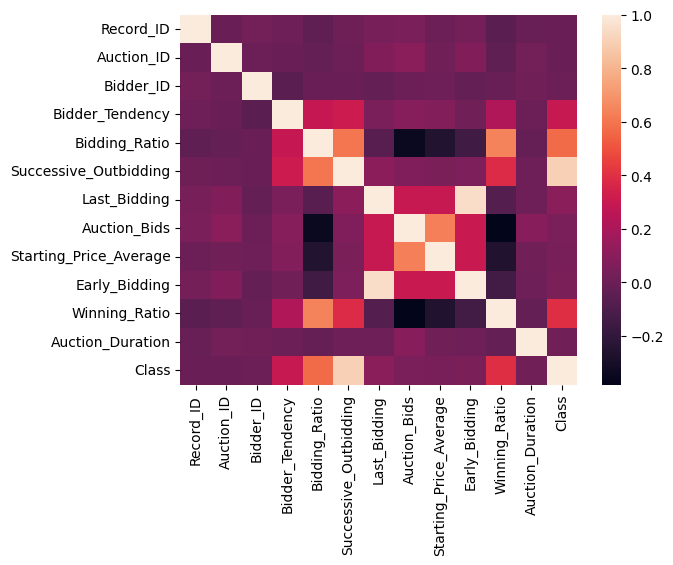

In [206]:
import seaborn as sns

sns.heatmap(data.corr())

In [207]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_norm = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [208]:
data_norm

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.000000,0.287011,0.286800,0.200000,0.392857,0.0,0.000028,0.000000,0.993657,0.000028,0.666667,0.444444,0.0
1,0.000066,0.287011,0.487179,0.024390,0.190476,0.0,0.013124,0.000000,0.993657,0.013124,0.944444,0.444444,0.0
2,0.000132,0.287011,0.862298,0.142857,0.190476,0.0,0.003042,0.000000,0.993657,0.003042,1.000000,0.444444,0.0
3,0.000198,0.287011,0.222222,0.100000,0.190476,0.0,0.097487,0.000000,0.993657,0.097487,1.000000,0.444444,0.0
4,0.000264,0.353336,1.000000,0.051282,0.212963,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,0.999009,0.298066,0.631529,0.333333,0.150000,1.0,0.738631,0.355224,0.993657,0.686426,0.888889,0.222222,1.0
6317,0.999538,0.977497,0.833808,0.030612,0.120083,0.0,0.005755,0.275795,0.993657,0.000010,0.878788,0.666667,0.0
6318,0.999604,0.977497,0.519468,0.055556,0.032091,0.0,0.015665,0.275795,0.993657,0.015665,0.000000,0.666667,0.0
6319,0.999670,0.977497,0.401709,0.076923,0.076087,0.0,0.068701,0.275795,0.993657,0.000415,0.000000,0.666667,0.0


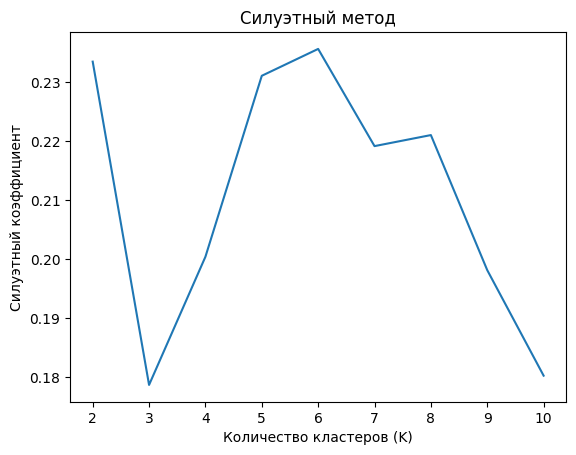

In [209]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Список для хранения значений силуэта
silhouette_scores = []

# Вычисление силуэтного коэффициента для K от 2 до 10
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_norm)
    score = silhouette_score(data_norm, kmeans.labels_)
    silhouette_scores.append(score)

# Построение графика
plt.plot(range(2, 11), silhouette_scores)
plt.title('Силуэтный метод')
plt.xlabel('Количество кластеров (K)')
plt.ylabel('Силуэтный коэффициент')
plt.show()


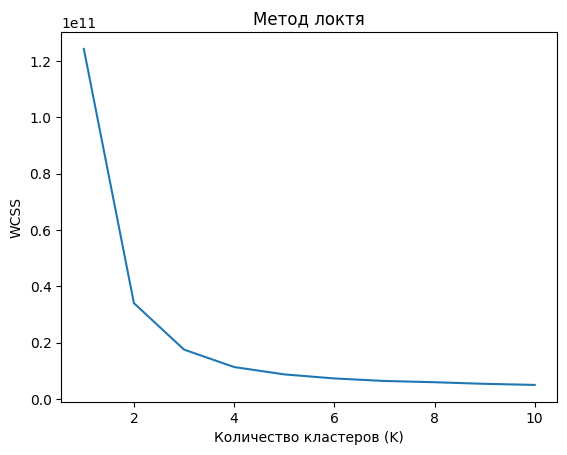

In [210]:
wcss = []

# Вычисление WCSS для K от 1 до 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Построение графика
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров (K)')
plt.ylabel('WCSS')
plt.show()

### Где-то 5-6 в общем

In [211]:
kmeans = KMeans(n_clusters=5, random_state=0)
preds = kmeans.fit_predict(data_norm)

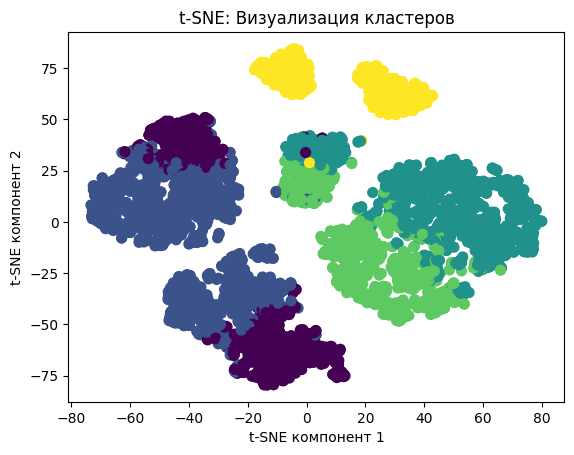

In [212]:
from sklearn.manifold import TSNE

# Применение t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(data_norm)

# Визуализация
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=preds, s=50, cmap='viridis')
plt.title('t-SNE: Визуализация кластеров')
plt.xlabel('t-SNE компонент 1')
plt.ylabel('t-SNE компонент 2')
plt.show()


In [213]:
import numpy as np

t = pd.DataFrame(np.stack((preds, data['Class']), axis=-1))

d = {'pred':[], 'class':[], 'count':[]}
for i in t[0].value_counts().keys():
    for j in [0, 1]:
        temp = t[t[0] == i]
        d['pred'].append(i)
        d['class'].append(j)
        d['count'].append(len(temp[temp[1]==j]))

res = pd.DataFrame(d)
res[res['count'] > 1]

,pred,class,count
0,1,0,1930
2,2,0,1538
4,3,0,1131
6,0,0,1043
8,4,0,4
9,4,1,674


## Без признака Class

In [214]:
d1 = data.drop(['Class'], axis=1)
data_norm1 = pd.DataFrame(scaler.fit_transform(d1), columns=d1.columns)


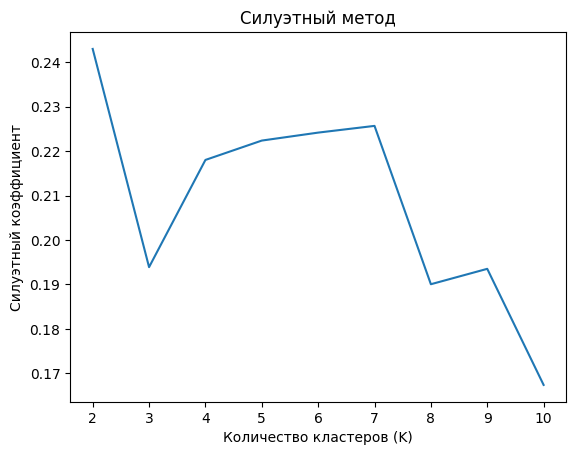

In [215]:
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_norm1)
    score = silhouette_score(data_norm1, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Силуэтный метод')
plt.xlabel('Количество кластеров (K)')
plt.ylabel('Силуэтный коэффициент')
plt.show()


In [216]:
kmeans = KMeans(n_clusters=7, random_state=0)
preds = kmeans.fit_predict(data_norm1)

In [217]:
t = pd.DataFrame(np.stack((preds, data['Class']), axis=-1))

d = {'pred':[], 'class':[], 'count':[]}
for i in t[0].value_counts().keys():
    for j in [0, 1]:
        temp = t[t[0] == i]
        d['pred'].append(i)
        d['class'].append(j)
        d['count'].append(len(temp[temp[1]==j]))
res = pd.DataFrame(d)
res[res['count'] > 1]

,pred,class,count
0,2,0,1308
1,2,1,2
2,5,0,1097
3,5,1,166
4,4,0,1010
5,4,1,12
6,3,0,861
8,1,0,327
9,1,1,351
10,6,0,453


In [218]:
data['Class'].value_counts()

Class
0    5646
1     675
Name: count, dtype: int64